<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Проверка-эффективности-обогащения" data-toc-modified-id="Проверка-эффективности-обогащения-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Проверка эффективности обогащения</a></span></li><li><span><a href="#Анализ-признаков,-недоступных-в-тестовой-выборке.-Что-это-за-параметры?-К-какому-типу-относятся?" data-toc-modified-id="Анализ-признаков,-недоступных-в-тестовой-выборке.-Что-это-за-параметры?-К-какому-типу-относятся?-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Анализ признаков, недоступных в тестовой выборке. Что это за параметры? К какому типу относятся?</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Посмотрим,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки.-Опишите-выводы." data-toc-modified-id="Посмотрим,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки.-Опишите-выводы.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.</a></span></li><li><span><a href="#Сравнение-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках.-Если-распределения-сильно-отличаются-друг-от-друга,-оценка-модели-будет-неправильной." data-toc-modified-id="Сравнение-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках.-Если-распределения-сильно-отличаются-друг-от-друга,-оценка-модели-будет-неправильной.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.</a></span></li><li><span><a href="#Исследование-суммарной-концентрации-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах." data-toc-modified-id="Исследование-суммарной-концентрации-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-для-вычисления-итоговой-sMAPE" data-toc-modified-id="Функция-для-вычисления-итоговой-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция для вычисления итоговой sMAPE</a></span></li><li><span><a href="#Обучение-разных-моделей-и-оценка-их-качества-кросс-валидацией." data-toc-modified-id="Обучение-разных-моделей-и-оценка-их-качества-кросс-валидацией.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение разных моделей и оценка их качества кросс-валидацией.</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [42]:
#импортируем нужные библиотеки
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from tqdm import tqdm

In [43]:
#выгрузим данные
test_df = pd.read_csv('/datasets/gold_recovery_test_new.csv')
train_df = pd.read_csv('/datasets/gold_recovery_train_new.csv')
full_df = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [44]:
#посмотрим на данные
test_df.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [45]:
train_df.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [46]:
full_df.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [47]:
display(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

None

In [48]:
display(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


None

In [49]:
display(full_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


None

In [50]:
test_df.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


In [51]:
train_df.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


In [52]:
full_df.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


### Проверка эффективности обогащения

In [53]:
#на примере золота 
#содержание компонент в исходном ископаемом
alpha = train_df['rougher.input.feed_au']
#содержание компонент в полученных концентратах
beta = train_df['rougher.output.concentrate_au']
#содержание компонент в хвостах
theta = train_df['rougher.output.tail_au']

In [54]:
train_df['recovery_calc'] = 100 * (beta * (alpha - theta)) / (alpha * (beta - theta))
rcm = train_df['recovery_calc'].mean()
rm = train_df['rougher.output.recovery'].mean()
if (rcm == rm):
    print('Эффективность обогащения посчитана правильно')
else:
    print('Эффективность обогащения посчитана неправильно')

Эффективность обогащения посчитана правильно


In [55]:
#Найдём MAE между столбцом 'recovery_calc' и 'rougher.output.recovery'
mae = mean_absolute_error(train_df['recovery_calc'], train_df['rougher.output.recovery'])
print('Значение MAE:', mae)

Значение MAE: 1.1131451184435918e-14


Значение получилось очень маленьким, поэтому обогащение посчитано правильно.

### Анализ признаков, недоступных в тестовой выборке. Что это за параметры? К какому типу относятся?

In [56]:
list_columns = [i for i in train_df.columns if i not in test_df.columns]

In [57]:
list_columns

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

Все эти признаки отсутствуют в тестовой выборке. Все они содержат output, то есть относятся не к сырью, а к параметрам продуктов или к разным этапам обогащения.

### Предобработка данных

Описании сказано, что _Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи._ Поэтому можем заполнить пропущение значения значениями из следующего ряда, которые соответствуют ближайшим значениям времени.

In [58]:
#посмотрим на пропуски в данных
print(test_df.isna().sum())

date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatb

In [59]:
print(train_df.isna().sum())

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
recovery_calc                                   0
Length: 88, dtype: int64


In [60]:
print(full_df.isna().sum())

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64


In [61]:
test_df.fillna(method='ffill', inplace=True)
train_df.fillna(method='ffill', inplace=True)
full_df.fillna(method='ffill', inplace=True)

In [62]:
#проверим
print(test_df.isna().sum())
print(train_df.isna().sum())
print(full_df.isna().sum())

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

In [63]:
#посмотрим на дубликаты
print(test_df.duplicated().sum())
print(train_df.duplicated().sum())
print(full_df.duplicated().sum())

0
0
0


Предобработка данных была проведена, пропуски были странены. Дубликатов нет.

## Анализ данных

### Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.

* 'primary_cleaner.output.concentrate_x' соответствуют первичной отчистке
* 'final.output.concentrate_x' соответствуют финальной отчистке
* 'rougher.output.concentrate_x' - данные после обогащения
* 'rougher.input.feed_x'- данные с начальными концентрациями

In [64]:
#отфильтруем данные для золота
data_au = full_df[['rougher.input.feed_au',
                  'final.output.concentrate_au',
                  'primary_cleaner.output.concentrate_au',
                  'rougher.output.concentrate_au']]

In [65]:
#отфильтруем данные для серебра
data_ag = full_df[['rougher.input.feed_ag',
                  'final.output.concentrate_ag',
                  'primary_cleaner.output.concentrate_ag',
                  'rougher.output.concentrate_ag']]

In [66]:
#отфильтруем данные для свинца
data_pb = full_df[['rougher.input.feed_pb',
                  'final.output.concentrate_pb',
                  'primary_cleaner.output.concentrate_pb',
                  'rougher.output.concentrate_pb']]

In [67]:
au = [data_au['rougher.input.feed_au'].mean(),
      data_au['rougher.output.concentrate_au'].mean(),
      data_au['primary_cleaner.output.concentrate_au'].mean(),
      data_au['final.output.concentrate_au'].mean()]

In [68]:
ag = [data_ag['rougher.input.feed_ag'].mean(),
      data_ag['rougher.output.concentrate_ag'].mean(),
      data_ag['primary_cleaner.output.concentrate_ag'].mean(),
      data_ag['final.output.concentrate_ag'].mean()]

In [69]:
pb = [data_pb['rougher.input.feed_pb'].mean(),
      data_pb['rougher.output.concentrate_pb'].mean(),
      data_pb['primary_cleaner.output.concentrate_pb'].mean(),
      data_pb['final.output.concentrate_pb'].mean()]

In [70]:
step = ['начальная концентрация', 'после обогащения', 
       'после первичной отчистки', 'после финальной отчистки']

In [71]:
print('Данные для золота')
print('Начальная концентрация:', au[0])
print('Концентрация после обогащения:', au[1])
print('Концентрация после первичной отчистки:', au[2])
print('Концентрация после финальной отчистки:', au[3])

Данные для золота
Начальная концентрация: 8.266097326589103
Концентрация после обогащения: 19.772000139486316
Концентрация после первичной отчистки: 32.1194004078765
Концентрация после финальной отчистки: 44.0765129419528


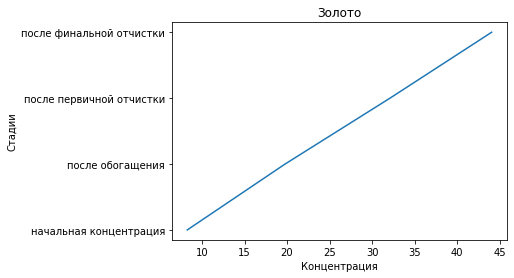

In [72]:
plt.plot(au, step);
plt.title('Золото');
plt.ylabel('Стадии');
plt.xlabel('Концентрация');

In [73]:
print('Данные для серебра')
print('Начальная концентрация:', ag[0])
print('Концентрация после обогащения:', ag[1])
print('Концентрация после первичной отчистки:', ag[2])
print('Концентрация после финальной отчистки:', ag[3])

Данные для серебра
Начальная концентрация: 8.794927425814688
Концентрация после обогащения: 11.994759359873429
Концентрация после первичной отчистки: 8.44240807771906
Концентрация после финальной отчистки: 5.168386967510243


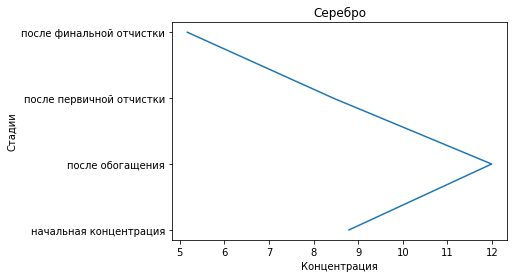

In [74]:
plt.plot(ag, step);
plt.title('Серебро');
plt.ylabel('Стадии');
plt.xlabel('Концентрация');

In [75]:
print('Данные для свинца')
print('Начальная концентрация:', pb[0])
print('Концентрация после обогащения:',pb[1])
print('Концентрация после первичной отчистки:', pb[2])
print('Концентрация после финальной отчистки:', pb[3])

Данные для свинца
Начальная концентрация: 3.585095711585748
Концентрация после обогащения: 7.606272313195003
Концентрация после первичной отчистки: 9.810316539310149
Концентрация после финальной отчистки: 9.978821384192907


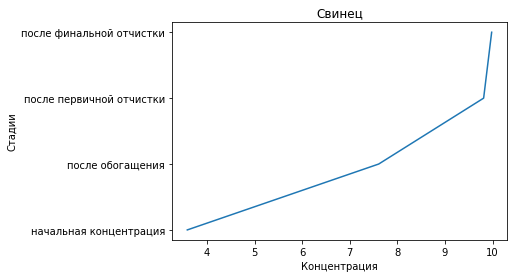

In [76]:
plt.plot(pb, step);
plt.title('Свинец');
plt.ylabel('Стадии');
plt.xlabel('Концентрация');

Концентрация золота и свинца в ходе процесса обогащения и отчистки увеличивается. Совершенно противоположный результат мы наблюдаем для серебра: концентрация серебра в начале этого процесса больше, чем после всех отчисток. Концентрация золота растёт линейно на всех стадиях обогащения и очистки. Для свинца этот процесс не является линейным.

###  Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

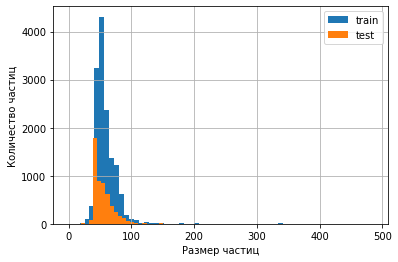

In [77]:
#для определения размеров гранул нужно посмотреть на средние значения столбцов primary_cleaner.input.feed_size 
#в тестовой и обучающей выборке
train_df['rougher.input.feed_size'].hist(bins=60,label='train')
test_df['rougher.input.feed_size'].hist(bins=60,label='test')
plt.ylabel('Количество частиц')
plt.xlabel('Размер частиц')
plt.legend();

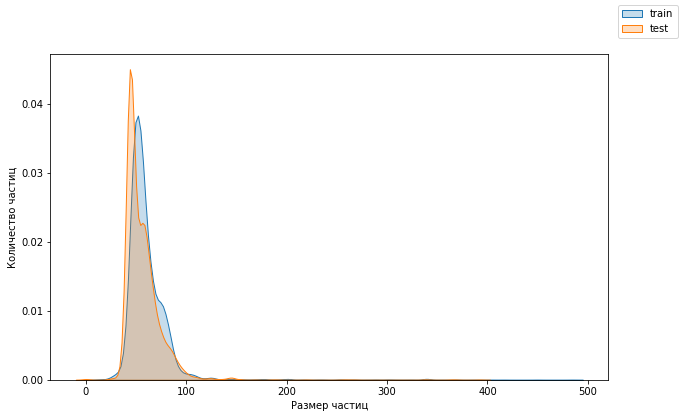

In [78]:
fig = plt.figure(figsize=(10,6))

sns.kdeplot(train_df['rougher.input.feed_size'], fill=True)
sns.kdeplot(test_df['rougher.input.feed_size'], fill=True)

plt.ylabel('Количество частиц')
plt.xlabel('Размер частиц')
fig.legend(labels=['train', 'test'])

plt.show()

### Исследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. 

In [79]:
#суммарная начальная концентрация
sum_input = full_df[['rougher.input.feed_ag',
                   'rougher.input.feed_au',
                   'rougher.input.feed_pb',
                   'rougher.input.feed_sol']].sum(axis=1)
print(sum_input)

0        51.680034
1        50.659114
2        50.609929
3        51.061546
4        47.859163
           ...    
19434    53.415050
19435    53.696482
19436    54.589604
19437    54.027355
19438    53.535054
Length: 19439, dtype: float64


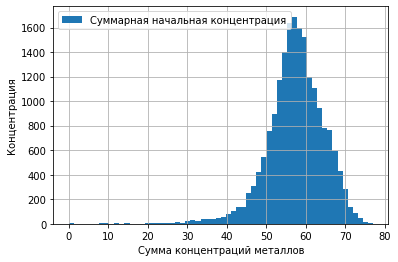

In [80]:
sum_input.hist(bins=60, label='Суммарная начальная концентрация')
plt.ylabel('Концентрация')
plt.xlabel('Сумма концентраций металлов')
plt.legend();

In [81]:
#суммарная концентрация после обогащения
sum_output = full_df[['rougher.output.concentrate_ag',
                   'rougher.output.concentrate_au',
                   'rougher.output.concentrate_pb',
                   'rougher.output.concentrate_sol']].sum(axis=1)
print(type(sum_output))

<class 'pandas.core.series.Series'>


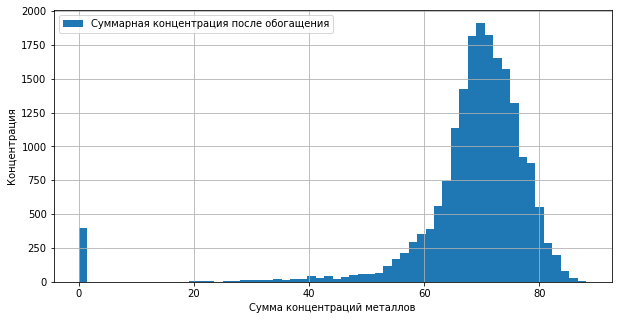

In [82]:
sum_output.hist(bins=60, 
               label='Суммарная концентрация после обогащения',
               figsize=(10,5))
plt.ylabel('Концентрация')
plt.xlabel('Сумма концентраций металлов')
plt.legend();

In [83]:
#суммарная концентрация после первой стадии отчистки
sum_primary = full_df[['primary_cleaner.output.concentrate_ag',
                   'primary_cleaner.output.concentrate_au',
                   'primary_cleaner.output.concentrate_pb',
                   'primary_cleaner.output.concentrate_sol']].sum(axis=1)
print(sum_primary)

0        72.640924
1        72.543485
2        72.095042
3        59.957723
4        71.321010
           ...    
19434    59.001692
19435    59.703912
19436    59.561096
19437    57.216686
19438    55.748041
Length: 19439, dtype: float64


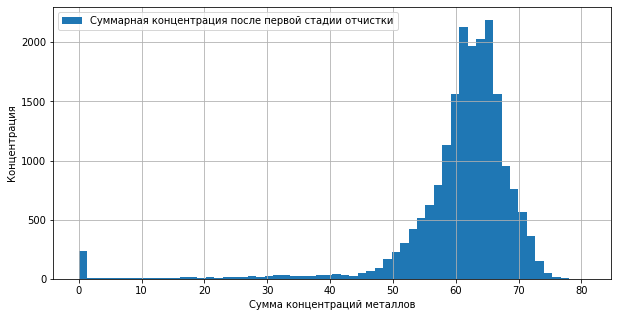

In [84]:
sum_primary.hist(bins=60, 
               label='Суммарная концентрация после первой стадии отчистки',
               figsize=(10,5))
plt.ylabel('Концентрация')
plt.xlabel('Сумма концентраций металлов')
plt.legend();

In [85]:
#суммарная финальная концентрация металлов
sum_final = full_df[['final.output.concentrate_ag',
                   'final.output.concentrate_au',
                   'final.output.concentrate_pb',
                   'final.output.concentrate_sol']].sum(axis=1)
print(sum_final)

0        63.644396
1        63.957723
2        64.311180
3        63.573449
4        64.004667
           ...    
19434    68.098589
19435    68.274362
19436    68.226068
19437    68.200449
19438    68.353154
Length: 19439, dtype: float64


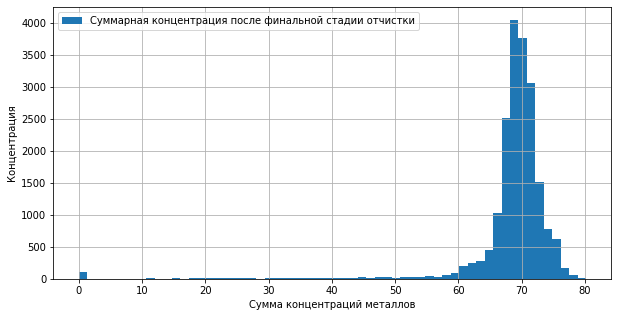

In [86]:
sum_final.hist(bins=60, 
               label='Суммарная концентрация после финальной стадии отчистки',
               figsize=(10,5))
plt.ylabel('Концентрация')
plt.xlabel('Сумма концентраций металлов')
plt.legend();

Как можем видеть на гистограммах с 2 по 4 есть выбросы около 0. Их нужно убрать из наших данных.

In [87]:
sum_output = sum_output.drop(sum_output[sum_output < 1].index)

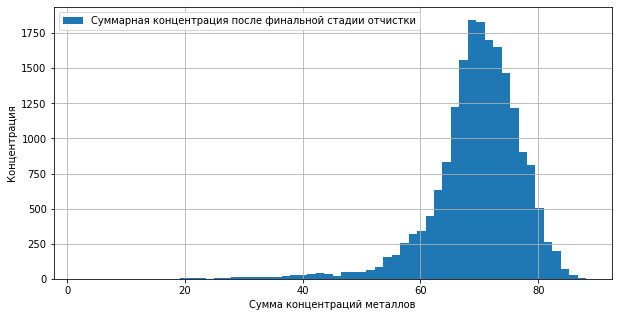

In [88]:
sum_output.hist(bins=60, 
               label='Суммарная концентрация после финальной стадии отчистки',
               figsize=(10,5))
plt.ylabel('Концентрация')
plt.xlabel('Сумма концентраций металлов')
plt.legend();

In [89]:
sum_primary = sum_primary.drop(sum_primary[sum_primary < 1].index)

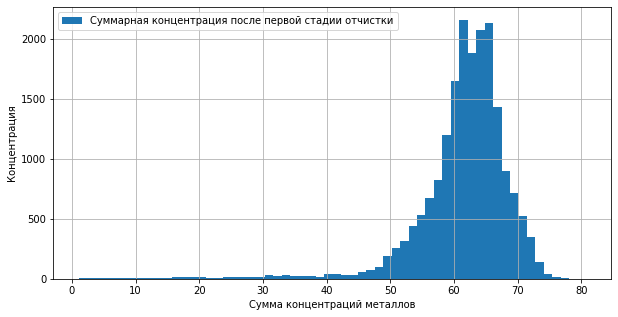

In [90]:
sum_primary.hist(bins=60, 
               label='Суммарная концентрация после первой стадии отчистки',
               figsize=(10,5))
plt.ylabel('Концентрация')
plt.xlabel('Сумма концентраций металлов')
plt.legend();

In [91]:
sum_final = sum_final.drop(sum_final[sum_final < 1].index)

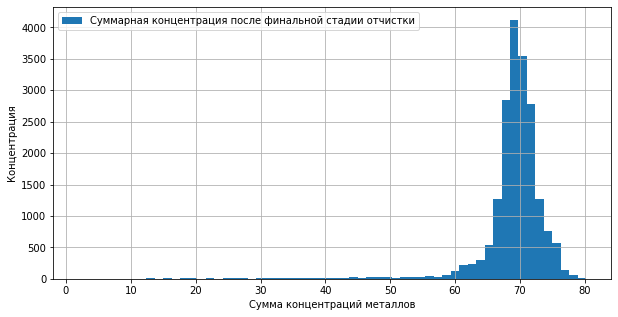

In [92]:
sum_final.hist(bins=60, 
               label='Суммарная концентрация после финальной стадии отчистки',
               figsize=(10,5))
plt.ylabel('Концентрация')
plt.xlabel('Сумма концентраций металлов')
plt.legend();

## Модель

### Функция для вычисления итоговой sMAPE

In [93]:
def smape(target, predicted):
  return 1 / len(target) * np.sum(2 * np.abs(
       target - predicted) / (np.abs(target) + 
                              np.abs(predicted)) * 100)

def smape_final(rougher, final):
  return 0.25 * rougher + 0.75 * final

In [94]:
#вводим, потому что GridSearchCV максимизирует метрику, а нам нужно наоборот
smape_score = make_scorer(smape, greater_is_better=False)

### Обучение разных моделей и оценка их качества кросс-валидацией. 

In [98]:
#создадим датасеты для обучения
target = full_df[['date', 'rougher.output.recovery', 'final.output.recovery']]
test_df = test_df.merge(full_df[['rougher.output.recovery', 'final.output.recovery', 'date']],
                         how = 'inner', on= 'date')
test_df.drop(['date'], axis=1, inplace=True)

In [99]:
list_columns_new = [i for i in train_df.columns if i not in test_df.columns]

In [100]:
train_df = train_df.drop(list_columns_new, axis=1)

In [101]:
#признаки и таргеты на тренировочной выборке
features_train_rougher = train_df.filter(regex='^rougher', axis=1)
features_train_rougher = features_train_rougher.drop(['rougher.output.recovery'], axis=1)
target_train_rougher = train_df['rougher.output.recovery']

features_train_final = train_df.drop(['final.output.recovery', 'rougher.output.recovery'], axis=1)
target_train_final = train_df['final.output.recovery']

In [102]:
#признаки и таргеты на тестовой выборке
features_test_rougher = test_df.filter(regex='^rougher', axis=1)
features_test_rougher = features_test_rougher.drop(['rougher.output.recovery'], axis=1)
target_test_rougher = test_df['rougher.output.recovery']

features_test_final = test_df.drop(['final.output.recovery', 'rougher.output.recovery'], axis=1)
target_test_final = test_df['final.output.recovery']

In [103]:
#проверка размеров
print(features_train_rougher.shape, target_train_rougher.shape)
print(features_train_final.shape, target_train_final.shape)
print(features_test_rougher.shape, target_test_rougher.shape)
print(features_test_final.shape, target_test_final.shape)

(14149, 22) (14149,)
(14149, 52) (14149,)
(5290, 22) (5290,)
(5290, 52) (5290,)


In [108]:
model_LR = LinearRegression()

rougher_LR = cross_val_score(model_LR, 
            features_train_rougher,
            target_train_rougher, 
            scoring=smape_score, cv=9)

final_LR =  cross_val_score(model_LR,
            features_train_final, 
            target_train_final,
            scoring=smape_score, cv=9)

print('Итоговое sMAPE для линейной регрессии:', smape_final(rougher_LR, final_LR).mean())

Итоговое sMAPE для линейной регрессии: -11.881861950576969


In [109]:
smape_value = 100
for depth in tqdm(range(1, 20)):
    
    model_DT = DecisionTreeRegressor(random_state=12345, max_depth=depth)
    
    rougher_DT = cross_val_score(model_DT, features_train_rougher,
                    target_train_rougher, scoring=smape_score, cv=6)
    final_DT = cross_val_score(model_DT, features_train_final,
                    target_train_final, scoring=smape_score, cv=6)
    
    sMAPE_final = smape_final(rougher_DT, final_DT).mean()
    if np.abs(sMAPE_final) < np.abs(smape_value):
        smape_value = sMAPE_final
        best_model_DT = model_DT
        best_depth = depth
        
print('Итоговое sMAPE для решающего дерева:', smape_value)

100%|██████████| 19/19 [01:27<00:00,  4.60s/it]

Итоговое sMAPE для решающего дерева: -10.972510046746047


In [110]:
smape_value = 100
for n_est in tqdm(range(1, 20, 5)):
    for depth in range(1, 10, 2):
        model_RF = RandomForestRegressor(random_state=12345, max_depth=depth, n_estimators=n_est)
    
        rougher_RF = cross_val_score(model_RF, features_train_rougher,
                    target_train_rougher, scoring=smape_score, cv=6)
        final_RF = cross_val_score(model_RF, features_train_final,
                    target_train_final, scoring=smape_score, cv=6)
    
        sMAPE_final = smape_final(rougher_RF, final_RF).mean()
        if np.abs(sMAPE_final) < np.abs(smape_value):
            smape_value = sMAPE_final
            best_model_RF = model_RF
            best_depth = depth
            best_est = n_est
        
print('Итоговое sMAPE для случайного леса:', smape_value)

100%|██████████| 4/4 [04:31<00:00, 67.77s/it]

Итоговое sMAPE для случайного леса: -10.744309715592886


In [111]:
#проверим лучшую модель на тестовой выборке
best_model_RF.fit(features_train_rougher,
                    target_train_rougher)
test_prediction_rougher_RF = best_model_RF.predict(features_test_rougher)

best_model_RF.fit(features_train_final,
                    target_train_final)
test_prediction_final_RF = best_model_RF.predict(features_test_final)

sMAPE_final_value = smape_final(smape(target_test_rougher,
                    test_prediction_rougher_RF),
                    smape(target_test_final, 
                    test_prediction_final_RF))
print('Итоговая ошибка лучшей модели на тестовой выборке', sMAPE_final_value)

Итоговая ошибка лучшей модели на тестовой выборке 9.362943743123074


In [112]:
#проверка на адекватность
model_dummy_rougher = DummyRegressor(strategy='mean')
model_dummy_final = DummyRegressor(strategy='mean')

model_dummy_rougher.fit(features_train_rougher,
            target_train_rougher)
model_dummy_final.fit(features_train_final,
            target_train_final)

test_prediction_rougher_DM = model_dummy_rougher.predict(features_test_rougher)
test_prediction_final_DM = model_dummy_final.predict(features_test_final)

sMAPE_final_dummy = smape_final(smape(target_test_rougher,
                                      test_prediction_rougher_DM),
                               smape(target_test_final,
                                     test_prediction_final_DM))
print('Итоговая ошибка константной модели', sMAPE_final_dummy)

Итоговая ошибка константной модели 10.289630376021034


Из сравнения нашей лучшей модели (Random Forest) и константной модели, получилось, что ошибка у Random Forest меньше (9.362943743123074).

## Вывод

В ходе проекты были выполненые следующие стадии:
1. Подготовка данных 
2. Анализ данных
3. Построение моделей прогнозирования
4. Проверка модели на адекватность

На первом этапе были обнаружены пропуски в данных, однако благодаря тому, что соседние параметры по времени похожи, мы смогли заменить пропущенные значения на следующие известные. Дубликатов обнаружено не было. Также в тестовой выборке отсутствовали некоторые расчётные и выходные характеристики процесса.

На этапе анализа данных были выявлены следующие закономерности: концентрация золота (с 8.27 до 44.1) и свинца в ходе процесса обогащения увеличивается с 8.27 до 44.1 и с 3.6 до 10, соответственно. Но концентрация серебра падает с 8.8 до 5.2. Увеличение концентрации свинца не удивительно, поскольку этот металл является побочным продуктом в процессе обогащения.

Также было проведено сравнение распределения размеров гранул сырья на обучающей и тестовой выборках. Полученные распределения примерно одинаковы, и это можно увидеть на нормализованных гистограммах. Кроме того, была исследована суммарная концентрация всех веществ на разных этапах обогащения руды. Были обнаружены и устранены аномалии.

Для обучения моделей была использована метрика sMAPE, а в качестве моделей обучались и тестировались модели линейной регрессии, решающего дерева и случайного леса. Лучший результат на тестовой выборке показал Random Forest (9.36). А далее была произведена проверка на адекватность нашей наилучшей модели с константной моделью. Ошибка у нашей модели меньше, поэтому 